# Resolution Trend - Time Series

### Import the training data set.

In [14]:
import pandas as pd

In [15]:
data = pd.read_csv('multiTimeline.csv', skiprows=1)
data.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


### Change the columns name to - Month, Diet, Gym, Finance.

In [16]:
data.columns = ['Month', 'Diets', 'Gym', 'Finance']
data.head()

,Month,Diets,Gym,Finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [17]:
data.rename(columns = {'Diets': 'Diet'}, inplace=True)
data.head()

,Month,Diet,Gym,Finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [18]:
#time series analysis different from machine learning

### Change the Month column to datetime in pandas.

In [19]:
data['Month'] = pd.to_datetime(data['Month'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month      168 non-null datetime64[ns]
Diet       168 non-null int64
Gym        168 non-null int64
Finance    168 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.3 KB


In [20]:
data.index = data['Month']
data.head()

,Month,Diet,Gym,Finance
Month,,,,
2004-01-01,2004-01-01,100,31,48
2004-02-01,2004-02-01,75,26,49
2004-03-01,2004-03-01,67,24,47
2004-04-01,2004-04-01,70,22,48
2004-05-01,2004-05-01,72,22,43


### Drop the month column from the dataset.

In [21]:
data.drop('Month', axis=1, inplace=True)
data.head()

,Diet,Gym,Finance
Month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


### Show the trend in all the different categories

In [22]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of persons')

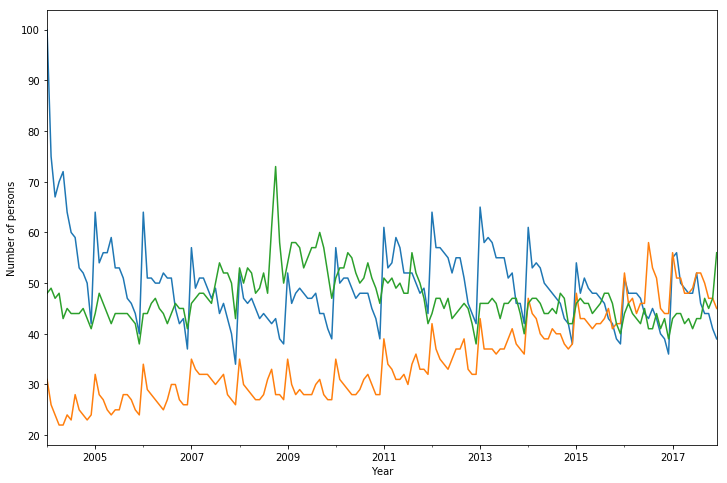

In [23]:
plt.figure(figsize=(12, 8))
data.Diet.plot()
data.Gym.plot()
data.Finance.plot()
plt.xlabel('Year')
plt.ylabel('Number of persons')

### Show a smoothe trend for Gym.

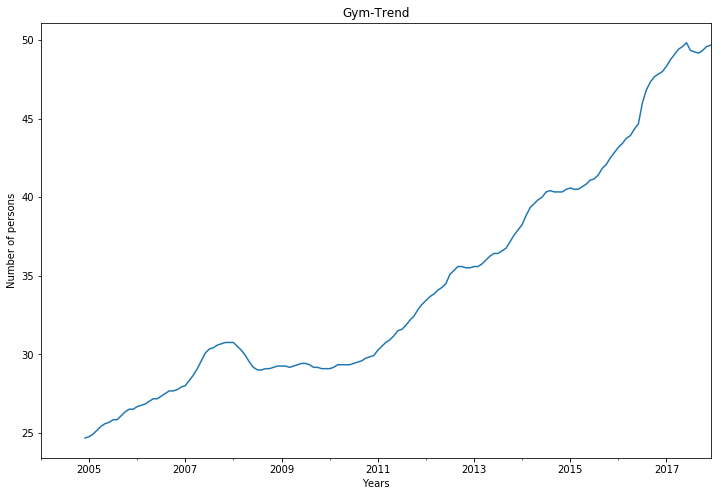

In [24]:
plt.figure(figsize=(12,8))
data.Gym.rolling(12).mean().plot()
plt.xlabel('Years')
plt.ylabel('Number of persons')
plt.title('Gym-Trend')
plt.show()

#in above figure it was not easy to come to conclusion whether values are inc or dec so we rolled 12 value and took a mean of those values so that they can be viewed properly...

### Forecasting

### 1. Naive Based approach

#### Split the data into training and validation data

In [25]:
data.tail(1)

,Diet,Gym,Finance
Month,,,
2017-12-01,39,45,56


In [49]:
training_data = data.loc[:'2016-02-01']
validation_data = data.loc['2016-02-01':]
training_data.tail()
validation_data

,Diet,Gym,Finance
Month,,,
2016-02-01,48,46,46
2016-03-01,48,47,44
2016-04-01,48,44,43
2016-05-01,47,46,42
2016-06-01,44,46,45
2016-07-01,43,58,41
2016-08-01,45,53,41
2016-09-01,43,51,44
2016-10-01,40,45,41


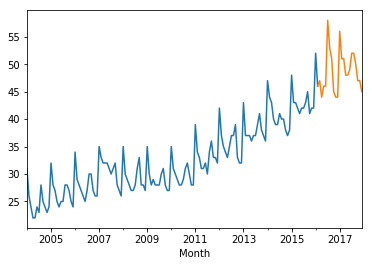

In [27]:
training_data.Gym.plot()
validation_data.Gym.plot()

In [28]:
naive_value = training_data.Gym.iloc[-1]
naive_list = [naive_value for i in range(0, validation_data.shape[0])]  #we have repeated the naive value in our validation_data(data we have to predict) cz this is naive method and in naive method value for the last year will be same for the upcoming year
naive_approach = validation_data.copy()
naive_approach.Gym
# print(validation_data.Gym)

Month
2016-02-01    46
2016-03-01    47
2016-04-01    44
2016-05-01    46
2016-06-01    46
2016-07-01    58
2016-08-01    53
2016-09-01    51
2016-10-01    45
2016-11-01    44
2016-12-01    44
2017-01-01    56
2017-02-01    51
2017-03-01    51
2017-04-01    48
2017-05-01    48
2017-06-01    49
2017-07-01    52
2017-08-01    52
2017-09-01    50
2017-10-01    47
2017-11-01    47
2017-12-01    45
Name: Gym, dtype: int64

In [29]:
naive_approach['Naive'] = naive_list
validation_data.Gym

Month
2016-02-01    46
2016-03-01    47
2016-04-01    44
2016-05-01    46
2016-06-01    46
2016-07-01    58
2016-08-01    53
2016-09-01    51
2016-10-01    45
2016-11-01    44
2016-12-01    44
2017-01-01    56
2017-02-01    51
2017-03-01    51
2017-04-01    48
2017-05-01    48
2017-06-01    49
2017-07-01    52
2017-08-01    52
2017-09-01    50
2017-10-01    47
2017-11-01    47
2017-12-01    45
Name: Gym, dtype: int64

In [30]:
naive_approach.Naive

Month
2016-02-01    46
2016-03-01    46
2016-04-01    46
2016-05-01    46
2016-06-01    46
2016-07-01    46
2016-08-01    46
2016-09-01    46
2016-10-01    46
2016-11-01    46
2016-12-01    46
2017-01-01    46
2017-02-01    46
2017-03-01    46
2017-04-01    46
2017-05-01    46
2017-06-01    46
2017-07-01    46
2017-08-01    46
2017-09-01    46
2017-10-01    46
2017-11-01    46
2017-12-01    46
Name: Naive, dtype: int64

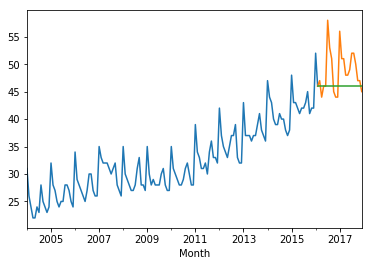

In [31]:
training_data.Gym.plot()
validation_data.Gym.plot()
naive_approach.Naive.plot()

### Checking the validation of our Forecast

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [33]:
naive_error = sqrt(mean_squared_error(validation_data.Gym, naive_approach.Naive))
print('Error is - ', naive_error)

Error is -  4.615663313770509


### Forecasting based on Moving approach

In [34]:
moving_approach = validation_data.copy()

In [35]:
moving_value = training_data.Gym.rolling(6).mean().iloc[-1]
moving_value

44.666666666666664

In [36]:
moving_approach.shape[0]

23

In [37]:
moving_list = [moving_value for i in range(moving_approach.shape[0])]
moving_approach['Moving'] = moving_list
moving_approach.head()

,Diet,Gym,Finance,Moving
Month,,,,
2016-02-01,48,46,46,44.666667
2016-03-01,48,47,44,44.666667
2016-04-01,48,44,43,44.666667
2016-05-01,47,46,42,44.666667
2016-06-01,44,46,45,44.666667


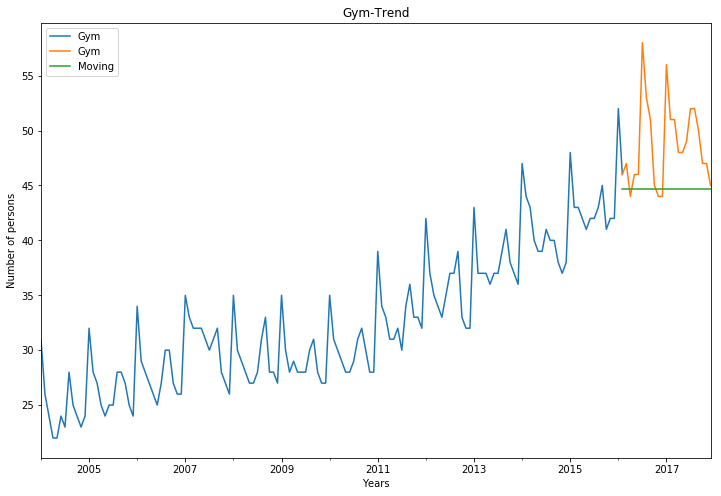

In [38]:
plt.figure(figsize=(12,8))
training_data.Gym.plot()
validation_data.Gym.plot()
moving_approach.Moving.plot()
plt.xlabel('Years')
plt.ylabel('Number of persons')
plt.title('Gym-Trend')
plt.legend(loc='best')
plt.show()

### Validation result for moving approach

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [40]:
rmse_moving = sqrt(mean_squared_error(moving_approach.Moving, validation_data.Gym))
print(rmse_moving)
# validation_data.Gym.shape[0]

5.501866174396302


### Simple Exponential Approach

In [41]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import numpy as np

In [42]:
ses_approach = validation_data.copy()
fit_data = SimpleExpSmoothing(np.asarray(training_data['Gym'])).fit(smoothing_level = 0.6, optimized=False)
ses_approach['SES'] = fit_data.forecast(len(validation_data))
ses_approach.head()

,Diet,Gym,Finance,SES
Month,,,,
2016-02-01,48,46,46,46.805421
2016-03-01,48,47,44,46.805421
2016-04-01,48,44,43,46.805421
2016-05-01,47,46,42,46.805421
2016-06-01,44,46,45,46.805421


In [43]:
ses_approach.SES

Month
2016-02-01    46.805421
2016-03-01    46.805421
2016-04-01    46.805421
2016-05-01    46.805421
2016-06-01    46.805421
2016-07-01    46.805421
2016-08-01    46.805421
2016-09-01    46.805421
2016-10-01    46.805421
2016-11-01    46.805421
2016-12-01    46.805421
2017-01-01    46.805421
2017-02-01    46.805421
2017-03-01    46.805421
2017-04-01    46.805421
2017-05-01    46.805421
2017-06-01    46.805421
2017-07-01    46.805421
2017-08-01    46.805421
2017-09-01    46.805421
2017-10-01    46.805421
2017-11-01    46.805421
2017-12-01    46.805421
Name: SES, dtype: float64

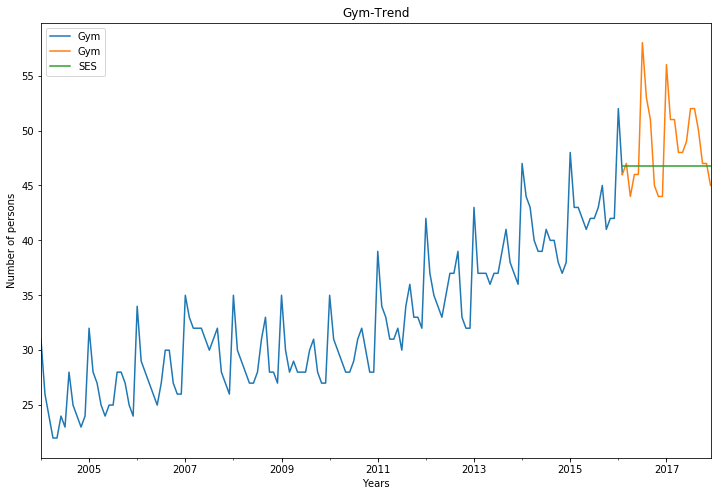

In [44]:
plt.figure(figsize=(12,8))
training_data.Gym.plot()
validation_data.Gym.plot()
ses_approach.SES.plot()
plt.xlabel('Years')
plt.ylabel('Number of persons')
plt.title('Gym-Trend')
plt.legend(loc='best')
plt.show()

In [45]:
rmse_moving = sqrt(mean_squared_error(ses_approach.SES, validation_data.Gym))
print(rmse_moving)

4.196520260591098
